# Python Examples

This notebook contains some examples of numerics and plotting in Python.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

First we will use a package to solve an initial value problem for the Lorenz system of ODEs

$$\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma(y-x)$$
$$\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho - z) - y$$
$$\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z$$
with parameters

$$\rho = 28,\sigma = 10,\beta = \frac{8}{3}.$$

The code below is adapted from [the Wikipedia page](https://en.wikipedia.org/wiki/Lorenz_system) and from the scipy documentation.

In [2]:
# This cell defines a function that computes the right hand side,
# i.e. the vector field, i.e. the time tendency.
def lorenz(t,u):
    RHS = u.copy()
    RHS[0] = 10*(u[1]-u[0])
    RHS[1] = u[0]*(28-u[2]) - u[1]
    RHS[2] = u[0]*u[1] - (8/3)*u[2]
    return RHS

In [3]:
# This cell uses a scipy ODE solver to compute an approximate solution
sol = solve_ivp(lorenz,[0,25],[1,1,1],dense_output=True)

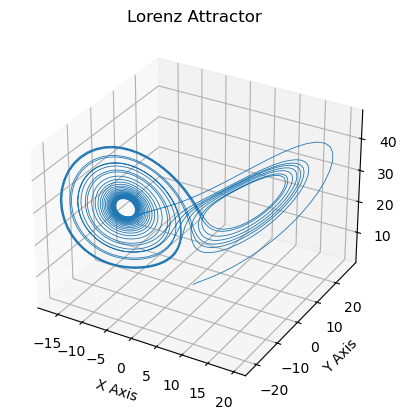

In [4]:
# This cell plots the solution
t = np.linspace(0,25,2501)
u = sol.sol(t)
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*u, lw=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Next we will consider the linear system of ODEs that results from a finite-difference discretization of the heat equation, and we will solve the initial value problem and plot the solution.

The PDE is $\partial_t u = \partial_{x}^2u$ and we will consider the domain $x=[0,1]$ with boundary conditions $u(0)=u(1) = 0$.
We will approximate the solution at $M-1$ interior points $x_m = m/M$, $m=1,\ldots,M-1$:

$$u_m(t)\approx u(x_m,t).$$

The finite-difference approximation to the second derivative that we will use is

$$\partial_{x}^2u(x_m,t) \approx \frac{1}{\Delta x^2}\left(u(x_{m-1},t) - 2 u(x_m,t) + u(x_{m+1},t)\right)$$

where $\Delta x = \frac{1}{M}$.
Inserting this approximation into the PDE at the points $x_m$ yields a system of ODEs

$$\frac{\mathrm{d}\vec{u}}{\mathrm{d}t}=\mathbf{L}\vec{u}$$

The matrix $\mathbf{L}$ is

$$\mathbf{L} = \frac{1}{\Delta x^2}\left[\begin{array}{cccc}-2&1&&\\1&\ddots&\ddots&\\&\ddots&\ddots&1\\&&1&-2\end{array}\right].$$

We will use the initial condition $u(x,0) = \sin(\pi x)$.

The forward Euler method for solving this system of ODEs is

$$\vec{u}_{n+1}=\vec{u}_n + \Delta t \mathbf{L}\vec{u}_n$$

where $\Delta t$ is the size of the time step.

At this point all of our variables from the cells above are still in memory.
Also, a drawback of Jupyter notebooks is that you can't tell what variables exist, or what values
the variables take just by looking at the cells. You could run a cell that creates a variable, then delete the cell, but the variable would still exist.

We will use the `%reset` 'magic' command to clear all the variables. There are other options including the `del` command and the garbage collector `gc`. Be careful when using Jupyter notebooks. It's a good idea to restart the kernel and start from scratch from time to time. 

In [5]:
# clear all variables so that we're effectively starting over.
%reset -f

In [6]:
# The reset command wipes everything, so we need to re-import.
import numpy as np
import matplotlib.pyplot as plt

In [7]:
M = 100 # Spatial discretization
N = 500 # Time discretization
Δx = 1/M # Spatial grid size. To use a Greek letter as a variable, type (e.g.) \Delta then hit the tab key
Δt = 0.00005 # Time step size.
x = np.linspace(0,1,M+2)
x = x[1:-1]
u = np.zeros((M,N)) # Allocate space for the solution
u[:,0] = np.sin(np.pi*x) # Initial condition

In [8]:
L = np.zeros((M,M))
for i in range(M):
    L[i,i] = -2
for i in range(M-1):
    L[i,i+1] = 1
    L[i+1,i] = 1
L /= Δx**2

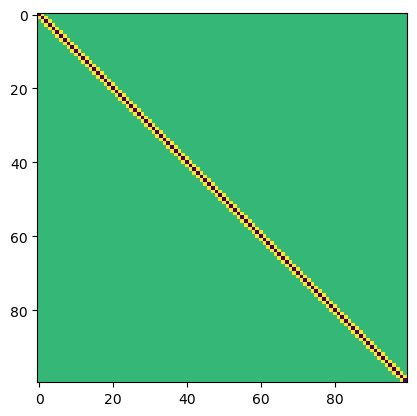

In [9]:
plt.imshow(L)

In [10]:
for n in range(1,N):
    u[:,n] = u[:,n-1] + Δt * L@u[:,n-1]

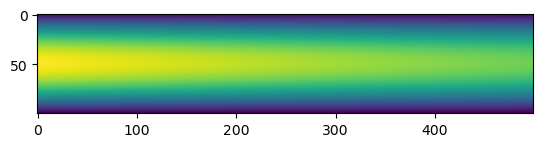

In [11]:
plt.imshow(u)